<a href="https://colab.research.google.com/github/cufezhusy/deephedging/blob/main/notebooks/trainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cdxbasics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 204 kB/s 


In [2]:
! git clone https://github.com/cufezhusy/deephedging/

Cloning into 'deephedging'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (152/152), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 152 (delta 85), reused 146 (delta 83), pack-reused 0
Receiving objects: 100% (152/152), 2.60 MiB | 15.69 MiB/s, done.
Resolving deltas: 100% (85/85), done.


# Deep hedging

Deep Hedging AI says hello  ... Tensorflow version 2.9.2


## Deep Hedging in Black \& Scholes World

Deep Hedging Engine: first of 400 epochs for 10000 samples (1000 validation samples) started. Compiling graph ...       


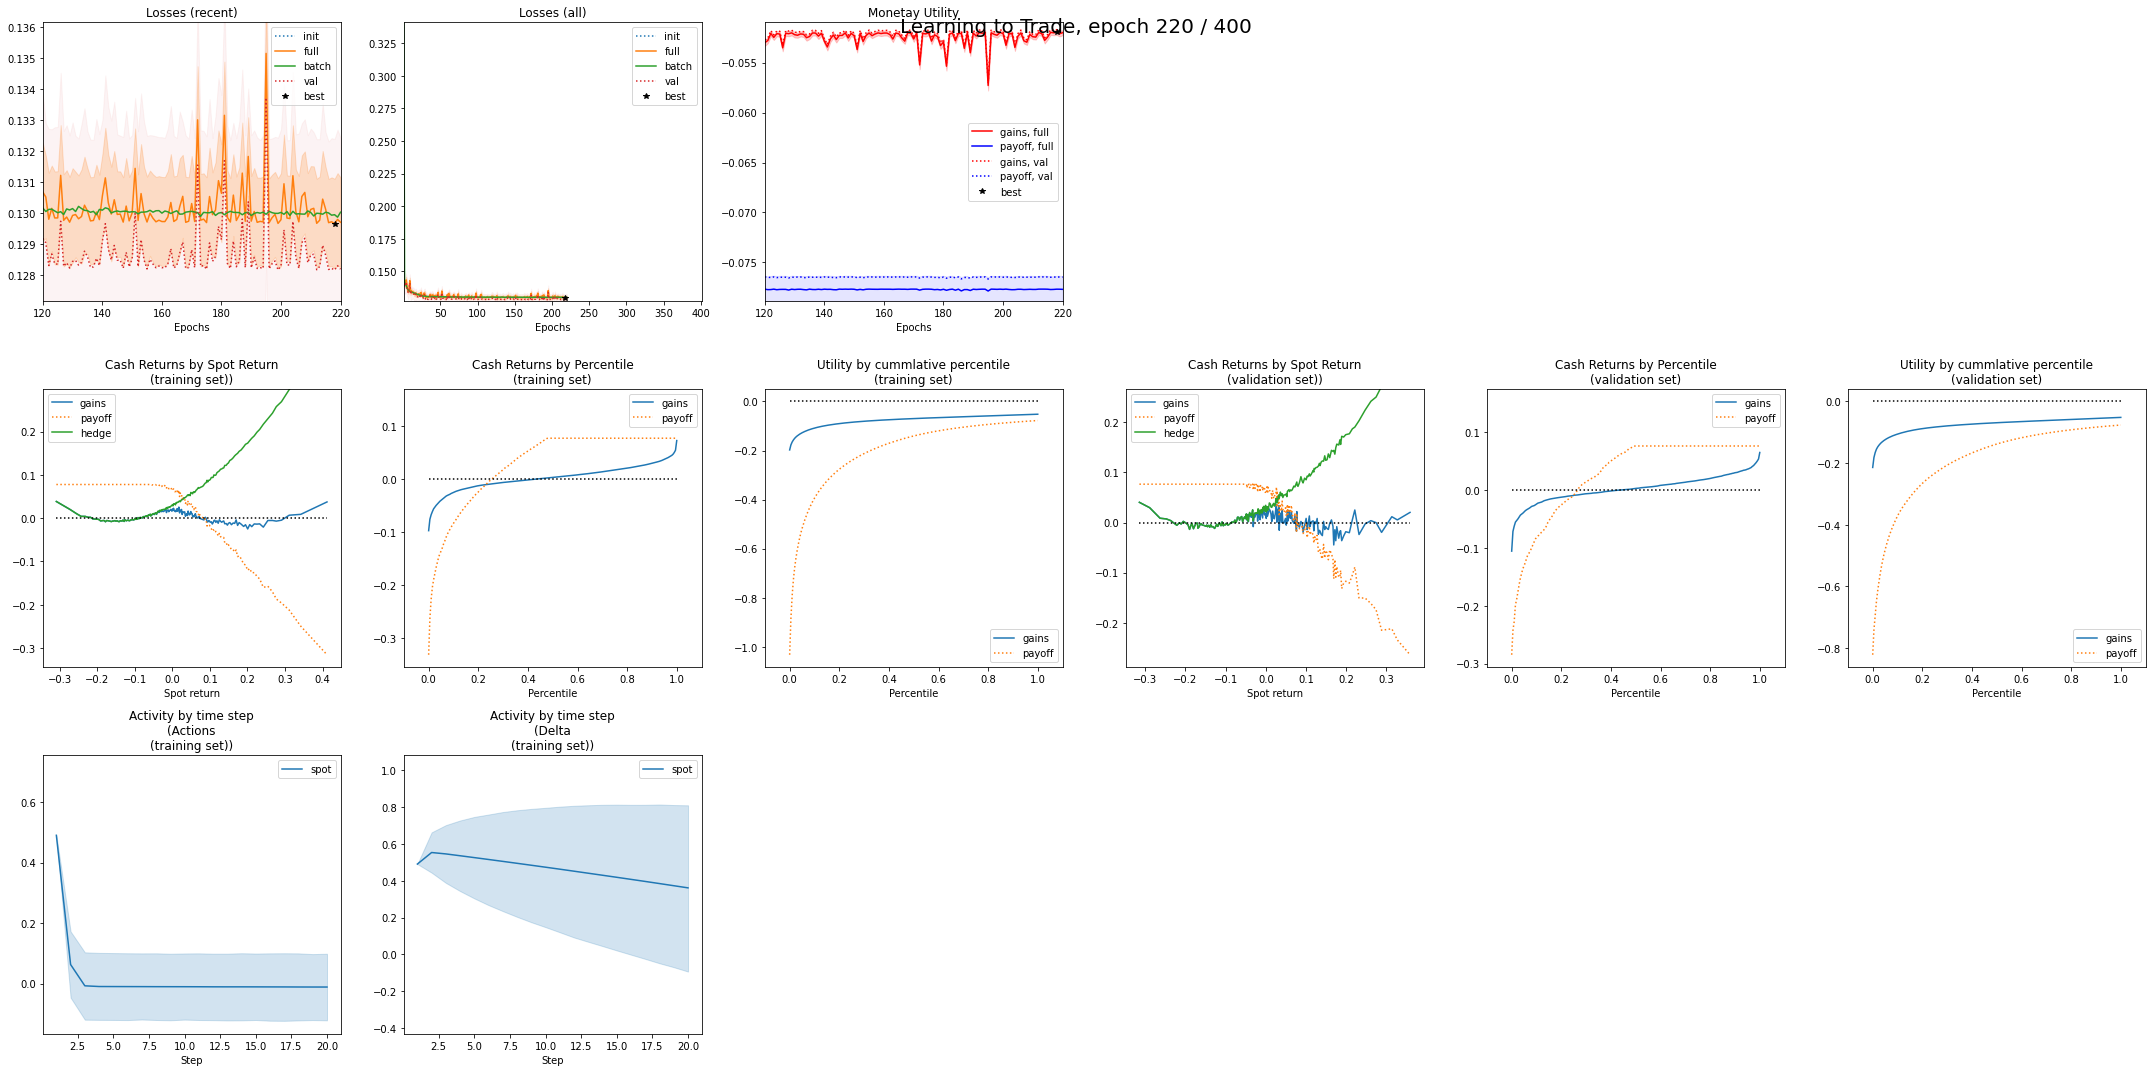

Training 220/400 epochs; 10000 samples; 1000 validation samples batch size 32 | initial loss 5.88773 (0.141087), full 0.129697 (0.00144705), best 0.129656 (0.141087), batch 0.130022, val 0.128183 (0.0042441). Best epoch 217 | time elapsed 28:51; estimated time remaining 23:44                         
 Status: Aborted



Exception ignored in: <function DynamicFig.__del__ at 0x7f599b84d9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/cdxbasics/dynaplot.py", line 177, in __del__
    self.close()        
  File "/usr/local/lib/python3.8/dist-packages/cdxbasics/dynaplot.py", line 267, in close
    self.render(experimental_mode)            
  File "/usr/local/lib/python3.8/dist-packages/cdxbasics/dynaplot.py", line 248, in render
    self.hdisplay.update(self.fig)  
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/display.py", line 393, in update
    update_display(obj, display_id=self.display_id, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/display.py", line 343, in update_display
    display(obj, display_id=display_id, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/display.py", line 313, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "/usr/local/lib/python3.8/dist-pa

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f5a05b18a60> (for post_execute):


KeyboardInterrupt: ignored

In [3]:
"""
When working on the code base, activate below code:

import imp
import deephedging.base as base
imp.reload(base)
import deephedging.world as world
imp.reload(world)
import deephedging.agents as agents
imp.reload(agents)
import deephedging.objectives as objectives
imp.reload(objectives)
import deephedging.gym as gym
imp.reload(gym)
import deephedging.trainer as trainer
imp.reload(trainer)
"""

print("Deep Hedging AI says hello  ... ", end='')
from cdxbasics.config import Config
from deephedging.trainer import train
from deephedging.gym import VanillaDeepHedgingGym
from deephedging.world import SimpleWorld_Spot_ATM

from IPython.display import display, Markdown

# see print of the config below for numerous options
config = Config()
# world
config.world.samples = 10000
config.world.steps = 20
config.world.black_scholes = True
config.world.drift = 0.0  # Mean drift of the asset; default: 0.1
config.world.strike = 0.0  # Relative strike. Set to zero to turn off option; default: 1.0
config.world.cost_p = 7.7  # Trading cost for the option on top of delta and vega cost; default: 0.0005
config.world.cost_s = 1 / 1000000.0  # Trading cost spot; default: 0.0002
config.world.cost_v = 7.7  # Trading cost vega; default: 0.02
# gym
config.gym.objective.utility = "exp2"
config.gym.objective.lmbda = 10.
config.gym.agent.network.depth = 3
config.gym.agent.network.activation = "softplus"
# trainer
config.trainer.train.batch_size = None
config.trainer.train.epochs = 400
config.trainer.train.run_eagerly = False
config.trainer.visual.epoch_refresh = 1
config.trainer.visual.time_refresh = 10
config.trainer.visual.confidence_pcnt_lo = 0.25
config.trainer.visual.confidence_pcnt_hi = 0.75

display(Markdown("## Deep Hedging in Black \& Scholes World"))

# create world
world  = SimpleWorld_Spot_ATM( config.world )
val_world  = world.clone(samples=1000)

# create training environment
gym = VanillaDeepHedgingGym( config.gym )

# create training environment
train( gym=gym, world=world, val_world=val_world, config=config.trainer )
r = gym(world.tf_data)
print("Keys of the dictionary returned by the gym: ", r.keys())

print("=========================================")
print("Config usage report")
print("=========================================")
print( config.usage_report() )
config.done()
